In [57]:
# Importing Libaries

import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

In [58]:
df_DA_US = df[(df['job_country'] == "United States") & (df['job_title_short'] == "Data Analyst")].dropna(subset=['salary_year_avg']).copy()

In [59]:
df_DA_US_exploded = df_DA_US.explode(column="job_skills")

In [60]:
df_DA_US_skills = df_DA_US_exploded.groupby(by='job_skills')['salary_year_avg'].aggregate(['count', 'median']).sort_values(by="count", ascending=False)

df_DA_US_skills = df_DA_US_skills.rename(columns={'count':'skill_count', 'median':'median_salary'})

In [61]:
df_DA_US_skills['skill_percent'] = df_DA_US_skills['skill_count'] / len(df_DA_US) * 100

In [62]:
df_DA_US_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [63]:
df_DA_skills_high_demand = df_DA_US_skills[df_DA_US_skills['skill_percent'] > 5]

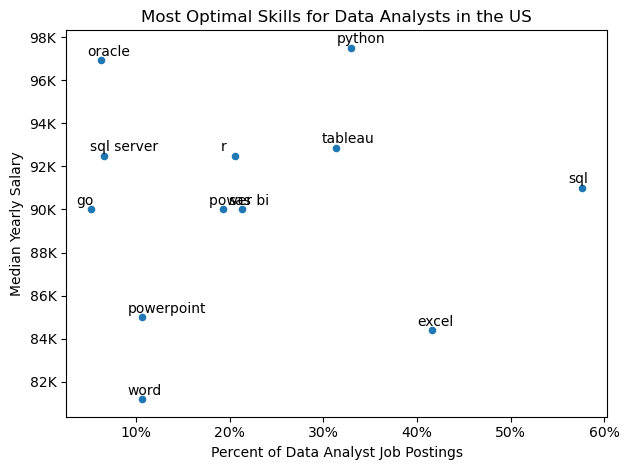

In [64]:

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

for i,txt in enumerate(df_DA_skills_high_demand.index):
    plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i] - 1.5, df_DA_skills_high_demand['median_salary'].iloc[i] + 210, txt)

# Set Axis lables, title and legend
plt.xlabel("Percent of Data Analyst Job Postings")
plt.ylabel("Median Yearly Salary")
plt.title("Most Optimal Skills for Data Analysts in the US")

# Formatting the ytickers
from matplotlib.ticker import PercentFormatter

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()

In [65]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

In [66]:
df_technology = df_technology.explode(column="skills")
df_technology

,technology,skills
0,analyst_tools,dax
0,analyst_tools,alteryx
0,analyst_tools,datarobot
0,analyst_tools,powerpoint
0,analyst_tools,ssrs
...,...,...
9,sync,wire
9,sync,microsoft teams
9,sync,twilio
9,sync,mattermost


In [67]:
df_DA_skills_high_demand = df_DA_skills_high_demand.merge(df_technology, left_on="job_skills", right_on="skills")

In [77]:
df_DA_skills_high_demand.set_index(keys="skills", inplace=True)

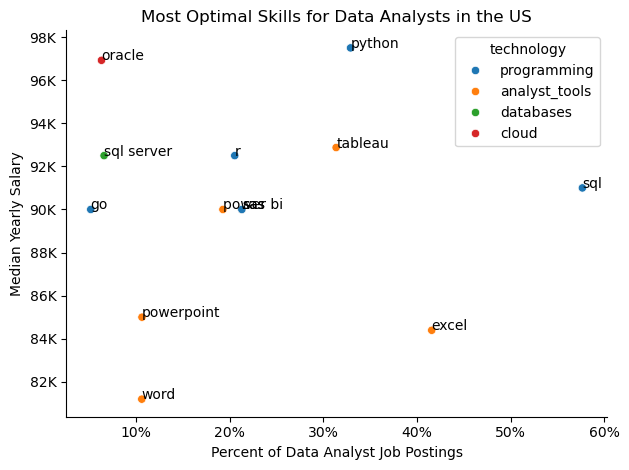

In [78]:
from matplotlib.ticker import PercentFormatter
# df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

sns.scatterplot(
    data=df_DA_skills_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)
sns.despine()
for i,txt in enumerate(df_DA_skills_high_demand.index):
    plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt)

# Set Axis lables, title and legend
plt.xlabel("Percent of Data Analyst Job Postings")
plt.ylabel("Median Yearly Salary")
plt.title("Most Optimal Skills for Data Analysts in the US")

# Formatting the yticker

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()